In [334]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
import re

In [233]:
names1880=pd.read_csv("data/babynames/yob1880.txt",names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [234]:
# 성별에 따른 사람 수
names1880.groupby("sex").births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [235]:
years=range(1880,2011)
pieces=[]
for year in years:
    path="data/babynames/yob%d.txt" % year
    frame=pd.read_csv(path,names=['name','sex','births'])
    frame['year']=year
    pieces.append(frame)
#     print(frame)
#     print("="*50,year)
len(pieces)
type(pieces) #list [1880's frame, 1881's frame,1882's framem,.....]
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [274]:
# 연도와 성별로 데이터 재구성
# 각 연도별 성별에 따른 데이터의 개수 (신생아 수)
# pivot_table의 함수 default는 mean
total_births=names.pivot_table(index='year',columns='sex',values='births',
                               aggfunc='sum')

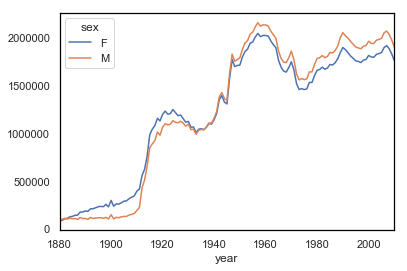

In [237]:
total_births.head()
total_births.plot()

In [238]:
# total_births['porp']
# 각 연도별, 성별 각각의 이름이 자치하는 비율 찾기
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [239]:
#169만의 의미? 각 년도별, 성별 이름에 대한 수 
names
sum=names.groupby(["year","sex"]).births.sum()
sum

year  sex
1880  F        90993
      M       110493
1881  F        91955
      M       100748
1882  F       107851
      M       113687
1883  F       112322
      M       104632
1884  F       129021
      M       114445
1885  F       133056
      M       107802
1886  F       144538
      M       110785
1887  F       145983
      M       101412
1888  F       178631
      M       120857
1889  F       178369
      M       110590
1890  F       190377
      M       111026
1891  F       185486
      M       101198
1892  F       212350
      M       122038
1893  F       212908
      M       112319
1894  F       222923
      M       115775
              ...   
1996  F      1751681
      M      1892700
1997  F      1739331
      M      1883571
1998  F      1765390
      M      1909676
1999  F      1772139
      M      1918267
2000  F      1813960
      M      1961702
2001  F      1798284
      M      1940498
2002  F      1794358
      M      1938941
2003  F      1824406
      M      1972439
200

In [240]:
#names.groupby(["year","sex"]).births.sum()
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group

#     group.info() 타입은 다 같음
#     print(group.births)
#     return group
names=names.groupby(['year','sex']).apply(add_prop)

In [478]:
# 연도별, 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
# prop을 기준으로 했을 때 각 녀도별 빈도수가 높은 이름
names.head()
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]  #데이터 순 정렬
    #print(group)
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
len(top1000) # 각 년도마다 상위 1000개씩 추출했으므로 
top1000.index=np.arange(len(top1000))
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [243]:
# 이름 유행 분석
boys=top1000[top1000.sex=='M']
girls=len(top1000[top1000.sex=='F'])

In [244]:
total_births=top1000.pivot_table(values='births',index='year',
                                 columns='name',aggfunc='sum')
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001308E874AC8>,
      dtype=object)

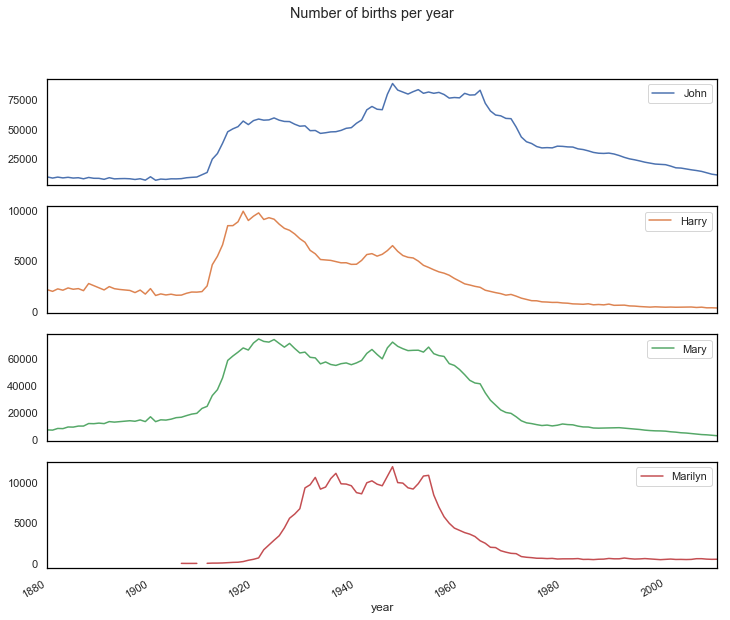

In [245]:
# 특정한 이름에 대해서 유행 분석
sub_set=total_births[['John','Harry','Mary','Marilyn']]
sub_set.plot(subplots=True,figsize=(12,10),title='Number of births per year')

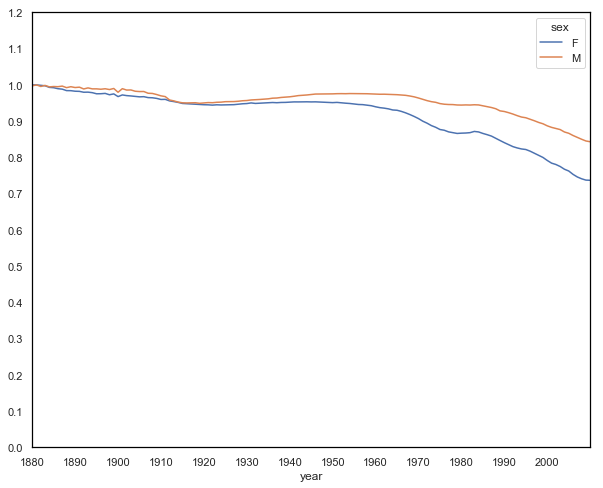

In [246]:
# 각 년도별 상위 1000개 이름 비율 
table=top1000.pivot_table(index="year",columns="sex",aggfunc="sum",values="prop")
table.shape
table.plot(xticks=range(1880,2010,10),yticks=np.linspace(0,1.2,13),figsize=(10,8))

In [247]:
df=boys[boys.year==2010]
prop_cumsum=df.sort_values(by="prop",ascending=False).prop.cumsum()
prop_cumsum[:10] #전체인덱스 0번~999번
prop_cumsum.values # .values는  serie의 값을 배열로 추출해줌
prop_cumsum.values.searchsorted(0.5) # 정렬된 상태에서 0.5가 값의 위치:117번째(116+1)
prop_cumsum.values[116]
# 만약 여자 이름의 비율 누적합 0.5 위치가 남자보다 크다면 남자이름보다 다양하다는 의미
# 만약 여자 이름의 비율 누적합 0.5 위치가 남자보다 작다면 남자이름이 더 다양하다는 의미

0.5006516075268308

In [248]:
df=boys[boys.year==1900]
in1900=df.sort_values(by="prop",ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)+1 # 정렬된 상태에서 0.5가 값의 위치:25번째(24+1)
# 1900년도에는 2010년보다 이름의 종류가 훨씬 단순했다는걸 알 수 잇음

25

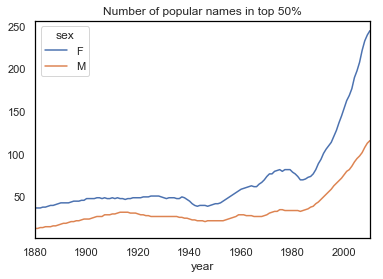

In [249]:
def get_quantile_count(group,q=0.5): # 함수를 호출하는 곳에서 q값을 전달하지 않아도 default로 q값을 0.5로 하겠다는 의미
    group=group.sort_values(by="prop",ascending=False)
    #print(group)
    return group.prop.cumsum().values.searchsorted(q)

diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex') # 옆으로 펼친것
diversity.plot(title='Number of popular names in top 50%')

In [277]:
# 전달되어진 문자 중 원하는 위치를 추출하는 사용자정의 함수
get_last_letter=lambda x: x[-1] #x에 전달되어진 문자 중 맨 마지막 문자를 추출하는 의미
last_letters=names.name.map(get_last_letter)
last_letters.name="last_letter"
last_letters
table=names.pivot_table('births',index=last_letters,columns=['sex','year'],
                        aggfunc='sum')
#이름을 글자로 분리->알파벳 문자 비율의 변화(1880,...2010)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [284]:
subtable=table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [285]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [293]:
letter_prop=subtable/(subtable.sum())
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

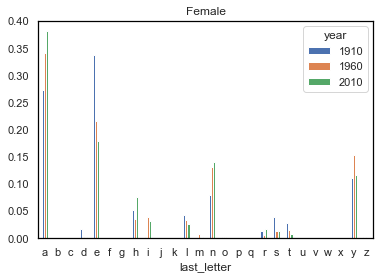

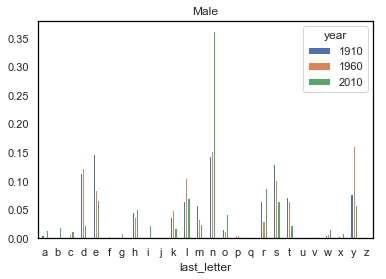

In [300]:
letter_prop['F'].plot(kind='bar',rot=0,title='Female')
letter_prop['M'].plot(kind='bar',rot=0,title='Male')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


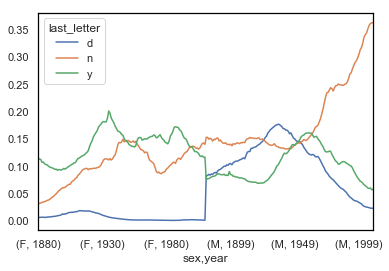

In [306]:
# d/n/y 로 끝나는 이름을 가진 남자아이의 출생 비율
#          d            n            y
# 1880   
# ...
# 2010
letter_prop=table/table.sum()
dny_ts=letter_prop.ix[['d','n','y']].T
dny_ts.plot()

In [290]:
# 과거에는 인기가 없었으나, 최근 인기 있는 이름?
# 남/여 이름의 인기가 바뀐 이름?
#ex) 옛날에는 남자이름으로 인기가 많았으나 최근들어 여자이름으로 인기를 갖는 이름)

In [392]:
unames=['user_id','gender','age','occupation','zip']
rnames=['user_id','movie_id','rating','timestamp']
mnames=['movie_id','title','genres']

users=pd.read_csv("data/movielens/users.dat",header=None,sep="::",names=unames)
ratings=pd.read_csv("data/movielens/ratings.dat",header=None,sep="::",names=rnames)
movies=pd.read_csv("data/movielens/movies.dat",header=None,sep="::",names=mnames)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [464]:
users.shape #(6040,5)
ratings.shape #(1000209, 4)
movies.shape #(3883, 3)
# movies.ix[:,1]
# 연도/제목를 추출하는 정규표현식 작성 -> year,title컬럼 생성
# 제목 -> title 컬럼
# 장르 -> 원핫인코딩 
movies['title']
# for i in range(len(movies)):
#     print(type(re.findall('[(]([0-9]+)[)]',movies['title'][i])))
movies['year']=movies['title'].str.extract('[(]([0-9]+)[)]')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
year        3883 non-null object
dtypes: int64(1), object(3)
memory usage: 121.4+ KB


In [434]:
data=pd.merge(pd.merge(ratings,users),movies)
data.info()
data.iloc[0] #0번 인덱스 자료 출력
data.ix[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [435]:
# 성별에 따른 각 영화의 평균 평점을 출력
#         F      M
# Drama  3.5    4.0
mean_ratings=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_ratings.shape #(3706,2)

(3706, 2)

In [436]:
ratings_by_title=data.groupby('title').size()
# ratings_by_title['X-Men(2000)'] => 타이틀 명 자체가 인덱스로 들어감
# ratings_by_title[ratings_by_title>=250]
active_titles=ratings_by_title.index[ratings_by_title>=250] # 인덱스만 추출
#ratings_by_title.values[ratings_by_title>=250] # 인덱스만 추출
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [437]:
len(active_titles)

1216

In [438]:
mean_ratings=mean_ratings.loc[active_titles]
#mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [439]:
top_female_ratings=mean_ratings.sort_index(by='F',ascending=False)
top_female_ratings

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [450]:
np.abs(-3) # 절대값
mean_ratings['diff']=np.abs(mean_ratings['M']-mean_ratings['F'])
#mean_ratings.sort_index(by='diff')
sorted_by_diff=mean_ratings.sort_values(by='diff')
sorted_by_diff.shape

In [456]:
sorted_by_diff[::] # 전체 다 출력
sorted_by_diff[::-1] # 맨 마지막 순서부터 출력
sorted_by_diff[::-1][0:5] # 5행 출력

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [459]:
data.groupby('title')['rating'].std() 
# 영화끼리 그룹화를 해놓은 상태에서 각 영화에 대한 rating의 표준편차 
# 표준편차가 크다는 것은 호불호가 많이 갈린다는 의미

title
$1,000,000 Duck (1971)                            1.092563
'Night Mother (1986)                              1.118636
'Til There Was You (1997)                         1.020159
'burbs, The (1989)                                1.107760
...And Justice for All (1979)                     0.878110
1-900 (1994)                                      0.707107
10 Things I Hate About You (1999)                 0.989815
101 Dalmatians (1961)                             0.982103
101 Dalmatians (1996)                             1.098717
12 Angry Men (1957)                               0.812731
13th Warrior, The (1999)                          1.140421
187 (1997)                                        1.057919
2 Days in the Valley (1996)                       0.921592
20 Dates (1998)                                   1.151943
20,000 Leagues Under the Sea (1954)               0.869685
200 Cigarettes (1999)                             1.111964
2001: A Space Odyssey (1968)                      

In [467]:
import json
fr=open("data/bitly_usagov/example.txt")
fr.readline()
#json.loads()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [473]:
records=[json.loads(line) for line in open("data/bitly_usagov/example.txt",
                                           encoding='utf-8')]
records[0] # 첫번째 딕셔너리 출력
records[0]['tz']

'America/New_York'

In [477]:
# [rec['tz'] for rec in records] => rec 안에 tx가 없는 부분이 있어서 오류 발생
time_zones=[rec['tz'] for rec in records if 'tz' in rec] 
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']